In [1]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

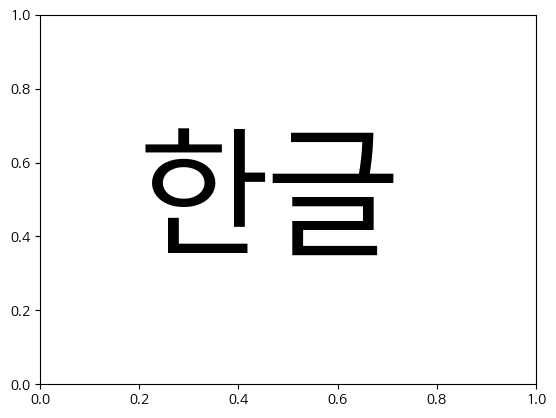

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
file_path = "./ref/행정구역시도성연령별취업자_20250304.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
ex_data = ori.copy() # 복사
ex_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex_data.loc[ex_data['resion']=='세종특별자치시','value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [5]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")

In [6]:
ex3_data = ori.copy() # 복사
ex3_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex3_data.loc[ex3_data['resion']=='세종특별자치시','value'] = ex3_data.loc[ex3_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex3_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [7]:
ex3_data['value'] = ex3_data['value'].astype(int)
ex3_data.loc[ex3_data['resion'] =='부산광역시']
ex4_data = ex3_data.loc[ex3_data['resion'] == '부산광역시']
ex4_data

,resion,year,age,gender,value
440,부산광역시,2014.1/4,20 - 29세,남자,96
441,부산광역시,2014.1/4,20 - 29세,여자,121
442,부산광역시,2014.1/4,30 - 39세,남자,221
443,부산광역시,2014.1/4,30 - 39세,여자,129
444,부산광역시,2014.1/4,40 - 49세,남자,247
...,...,...,...,...,...
875,부산광역시,2024.4/4,40 - 49세,여자,152
876,부산광역시,2024.4/4,50 - 59세,남자,218
877,부산광역시,2024.4/4,50 - 59세,여자,180
878,부산광역시,2024.4/4,60세이상,남자,215


In [8]:
ex4_data['value'] = ex4_data['value'].astype(int)
gen = ex4_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

C:\Users\Admin\AppData\Local\Temp\ipykernel_18016\3620589931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex4_data['value'] = ex4_data['value'].astype(int)


,year,gender,total
0,2014.1/4,남자,951
1,2014.1/4,여자,680
2,2014.2/4,남자,976
3,2014.2/4,여자,716
4,2014.3/4,남자,982
...,...,...,...
83,2024.2/4,여자,756
84,2024.3/4,남자,926
85,2024.3/4,여자,769
86,2024.4/4,남자,919


In [9]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

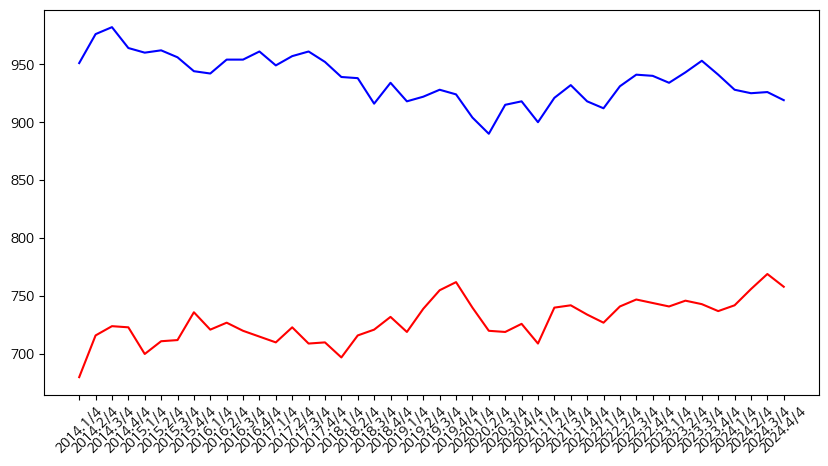

In [48]:
plt.figure(figsize=(10,5))
plt.plot(male['year'],male['total'],label='남자',color="blue",linestyle='-')
plt.plot(female['year'],female['total'],label='여자',color="red",linestyle='-')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()